In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [3]:
num_qubits = 5

In [4]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [5]:
num_layers = 1
var_state_class = ZGR_ansatz(num_qubits, num_layers)
#var_state_class = Rot_ansatz(num_qubits,num_layers)
#var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 6400x600 with 1 Axes>, <Axes: >)

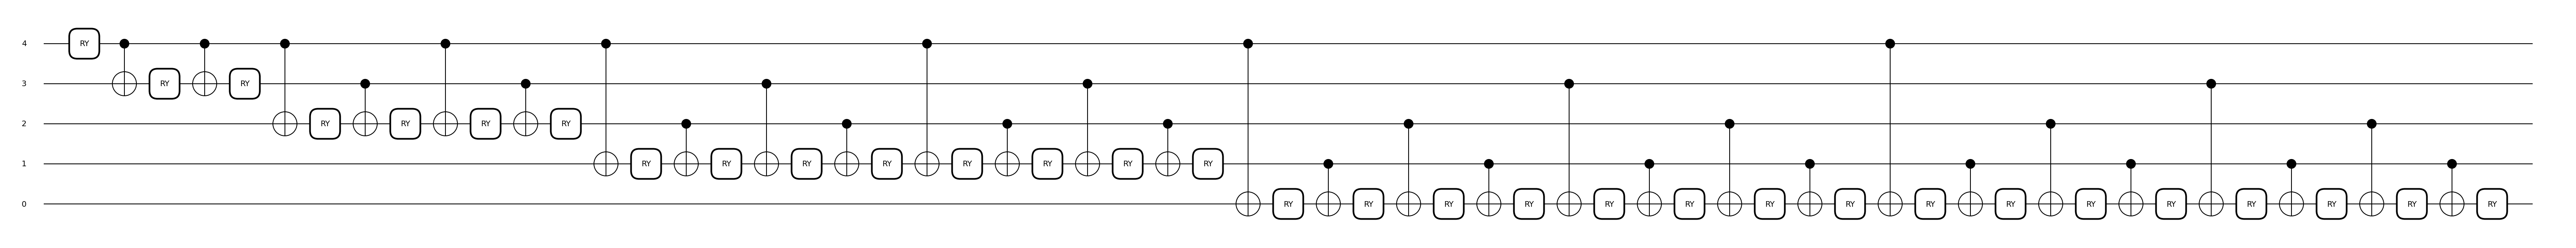

In [6]:
qml.draw_mpl( var_state )( num_params*[0] )

In [98]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state,
                    init_state = init_state,
                    semi_classical=False
                    )

In [99]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
val3 = vals[2]
vec3 = vecs[:,2] 
val4 = vals[3]
vec4 = vecs[:,3] 
val5 = vals[4]
vec5 = vecs[:,4] 
vals

array([-0.47997511, -0.11445451, -0.05192538, -0.02696533, -0.02098562,
        0.02113898,  0.02262916,  0.09479111,  0.09731981,  0.19349922,
        0.19805131,  0.31633205,  0.32371134,  0.4628699 ,  0.47376006,
        0.63288683,  0.64790227,  0.82624637,  0.84599124,  1.04286034,
        1.0679913 ,  1.28268526,  1.31397407,  1.54572834,  1.58415415,
        1.83214154,  1.87900524,  2.14242336,  2.19963967,  2.47917115,
        2.54944517,  2.88329965])

In [9]:
beta = np.exp(-0.5*np.sqrt(np.abs(val)))/(2*np.sqrt(np.abs(val)))

In [10]:
beta

0.5104115895695532

In [11]:
1/16

0.0625

In [12]:
vals[3]/vals[0]

0.05618067812131089

In [13]:
params_init = np.random.randn( num_params )*0.001
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
params_ground, energies_ground = varqft.run( params_init , max_iterations=300, learning_rate=0.2, conv_tol=1e-6 )

Step:    299, Energy:    -0.479913


In [14]:
#params_init

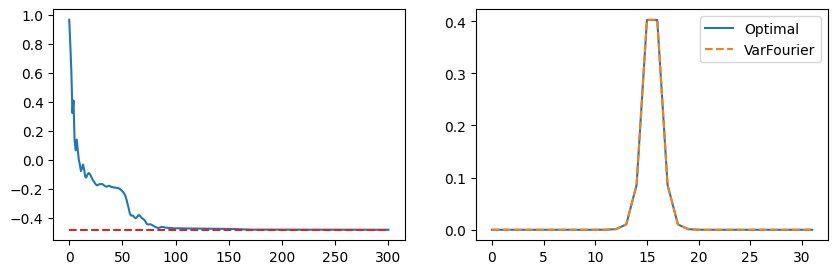

In [76]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vecs[:,0])**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [16]:
abs(np.vdot( ground_state, vec ))**2

0.9999102028930135

In [17]:
params_ground[-1]

Array([ 1.5707313e+00, -6.6274017e-01,  1.5708867e+00,  2.7938920e-01,
        9.5735177e-06,  1.1868223e+00, -1.5726447e+00,  7.4509881e-02,
        2.9952878e-02, -7.3199525e-02, -2.9462436e-02,  8.9430287e-02,
        3.5760984e-02, -1.6620455e+00,  1.5343252e+00, -1.1058347e-01,
       -9.0288907e-02,  1.1133899e-01,  9.4868287e-02,  8.5162260e-02,
        9.0041719e-02, -8.5921191e-02, -9.4558686e-02, -1.4493361e-01,
       -1.2312787e-01,  1.4669953e-01,  1.2902822e-01, -5.8573753e-01,
       -4.2327300e-01, -9.8684901e-01, -1.1535276e+00], dtype=float32)

In [18]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [19]:
params_init_ex = np.random.randn( num_params )*0.001

params_excited, energies_excited = varqft.run( params_init_ex, max_iterations=300, learning_rate= 0.1, conv_tol=1e-6)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


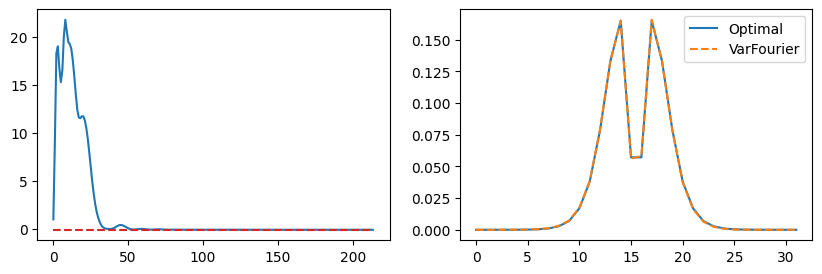

In [20]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [21]:
abs(np.vdot( ground_state, vec ))**2

0.9999102028930135

In [22]:
abs(np.vdot( ground_state, excited_state ))**2 

1.2198135928565002e-06

In [23]:
abs(np.vdot( excited_state, vec2 ))**2

0.9998755885957654

In [24]:
energies_excited[-1]/energies_ground[-1]

Array(0.23834753, dtype=float32)

In [25]:
vals[1]/vals[0]

0.23845925418564895

In [26]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1])] 
                    ) 

In [27]:
params_init_ex2 = np.random.randn( num_params )*0.001

params_excited2, energies_excited2 = varqft.run( params_init_ex2, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

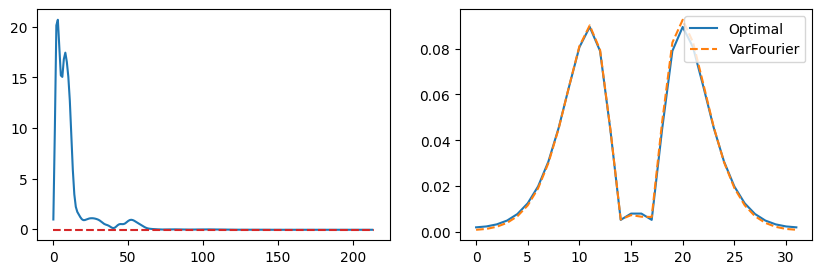

In [28]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited2 )
ax[0].hlines( val3, 0, len(energies_excited2), colors='tab:red', linestyles='--' ) 

excited_state2 = varqft.state( params_excited2[-1] )

ax[1].plot( np.abs(vec3)**2) 
ax[1].plot( np.abs(excited_state2)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [29]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1]),np.copy(params_excited2[-1])] 
                    ) 

In [88]:
params_init_ex3 = np.random.randn( num_params )*0.001

params_excited3, energies_excited3 = varqft.run( params_init_ex3, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


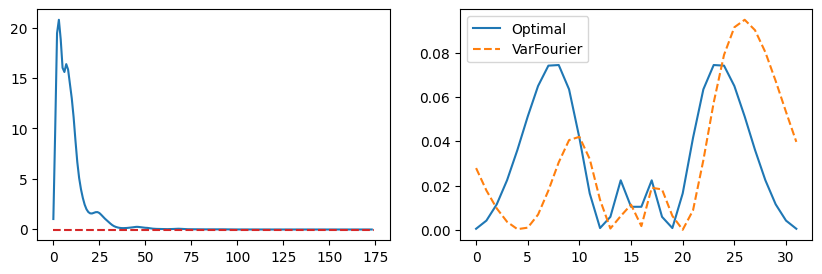

In [89]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited3 )
ax[0].hlines( val3, 0, len(energies_excited3), colors='tab:red', linestyles='--' ) 

excited_state3 = varqft.state( params_excited3[-1] )

ax[1].plot( np.abs(vec4)**2) 
ax[1].plot( np.abs(excited_state3)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [90]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25,25,25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1]),np.copy(params_excited2[-1]), np.copy(params_excited3[-1])] 
                    ) 

In [91]:
params_init_ex4 = np.random.randn( num_params )*0.001

params_excited4, energies_excited4 = varqft.run( params_init_ex4, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


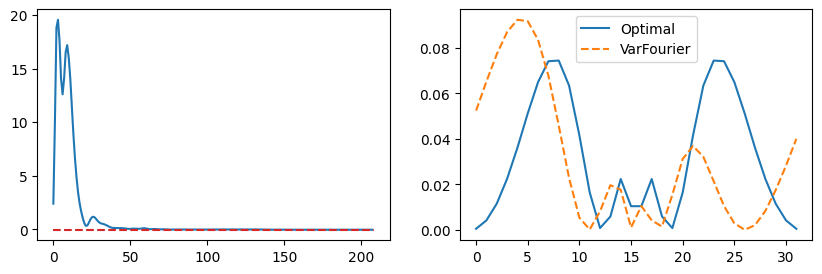

In [93]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited4 )
ax[0].hlines( val4, 0, len(energies_excited4), colors='tab:red', linestyles='--' ) 

excited_state4 = varqft.state( params_excited4[-1] )

ax[1].plot( np.abs(vec4)**2) 
ax[1].plot( np.abs(excited_state4)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

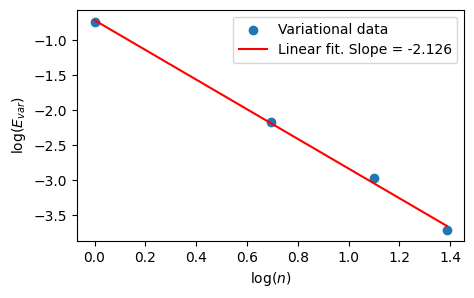

Pendiente = -2.126109024373462


In [71]:
fig, ax = plt.subplots( 1, 1, figsize=(5,3) ) 

#ax.scatter(1/(np.arange(1,5)**2) , np.abs(vals[0:4]) )
x = np.log(np.arange(1,5))
y = np.log(np.abs([energies_ground[-1],energies_excited[-1], energies_excited2[-1], energies_excited3[-1]]))
#y = np.log(np.abs(vals[0:4]))
ax.scatter(x , y, label = 'Variational data')
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.hlines( val3, 0, len(energies_excited3), colors='tab:red', linestyles='--' ) 
slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', label=f'Linear fit. Slope = {slope:3.3f}')

plt.xlabel('$\log(n)$')
plt.ylabel('$\log(E_{var})$')

plt.legend()
plt.savefig('../figures/Hydrogen_atom_energies.png')
plt.show()

print(f'Pendiente = {slope}')



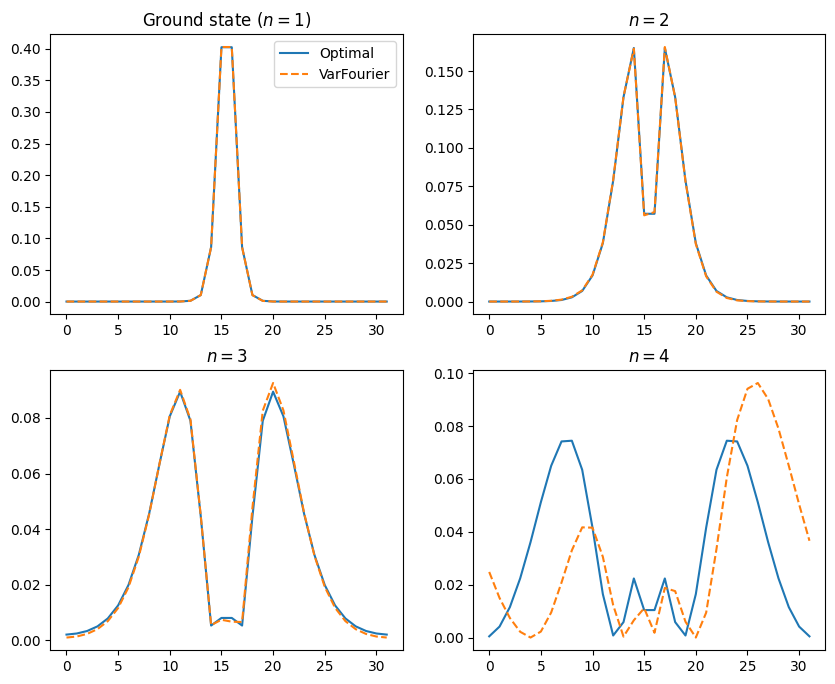

In [87]:
fig, ax = plt.subplots( 2, 2, figsize=(10,8) ) 


ground_state = varqft.state( params_ground[-1] )

ax[0,0].plot( np.abs(vecs[:,0])**2 ) 
ax[0,0].plot( np.abs(ground_state)**2, '--' ) 
ax[0,0].legend(['Optimal','VarFourier']) 
ax[0,0].set_title('Ground state ($n=1$)')

ax[0,1].plot( np.abs(vec2)**2) 
ax[0,1].plot( np.abs(excited_state)**2, '--' )
ax[0,1].set_title('$n=2$')

ax[1,0].plot( np.abs(vec3)**2) 
ax[1,0].plot( np.abs(excited_state2)**2, '--' ) 
ax[1,0].set_title('$n=3$')

ax[1,1].plot( np.abs(vec4)**2) 
ax[1,1].plot( np.abs(excited_state3)**2, '--' ) 
ax[1,1].set_title('$n=4$')

plt.savefig('../figures/Hydrogen_atom_first4states.png')
plt.show()